# Marvel Cinematic Universe Box Office Analysis

This project delves into the box office performance of movies within the Marvel Cinematic Universe (MCU) using the `mcu_box_office.csv` dataset. The primary objective is to conduct a comprehensive analysis, starting with data cleaning and feature engineering, followed by visualizations to identify top-performing films across various metrics such as opening weekend, domestic, and worldwide gross. This exploration aims to uncover key insights and trends in the financial success of MCU films, providing a clear understanding of their market impact and audience reception.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
marvel = pd.read_csv('/content/mcu_box_office.csv')
marvel.head(25)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


## Clean and Prepare Data


In [ ]:
columns_to_clean = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']

for col in columns_to_clean:
    if col in marvel.columns:
        marvel[col] = marvel[col].str.replace(',', '', regex=False)
        marvel[col] = pd.to_numeric(marvel[col])
    else:
        print(f"Column '{col}' not found in DataFrame.")

marvel['release_date'] = pd.to_datetime(marvel['release_date'])

print("Data types after cleaning and conversion:")
marvel.info()

Data types after cleaning and conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           27 non-null     object        
 1   mcu_phase             27 non-null     int64         
 2   release_date          27 non-null     datetime64[ns]
 3   tomato_meter          27 non-null     int64         
 4   audience_score        27 non-null     int64         
 5   movie_duration        27 non-null     int64         
 6   production_budget     27 non-null     int64         
 7   opening_weekend       27 non-null     int64         
 8   domestic_box_office   27 non-null     int64         
 9   worldwide_box_office  27 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.2+ KB


## Feature Engineering: Extract Release Year


In [ ]:
marvel['release_year'] = marvel['release_date'].dt.year
print("DataFrame with 'release_year' column added:")
marvel.head()

DataFrame with 'release_year' column added:


,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,release_year
0,Iron Man,1,2008-05-02,94,91,126,186000000,102118668,318604126,585171547,2008
1,The Incredible Hulk,1,2008-06-13,67,70,112,137500000,55414050,134806913,265573859,2008
2,Iron Man 2,1,2010-05-07,72,71,124,170000000,128122480,312433331,621156389,2010
3,Thor,1,2011-05-06,77,76,113,150000000,65723338,181030624,449326618,2011
4,Captain America: The First Avenger,1,2011-07-22,79,75,124,140000000,65058524,176654505,370569776,2011


## Identify and Visualize Top 10 by Opening Weekend


/tmp/ipython-input-4005224637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie_title', y='opening_weekend', data=top_10_opening_weekend, palette='viridis', label='Opening Weekend Gross')


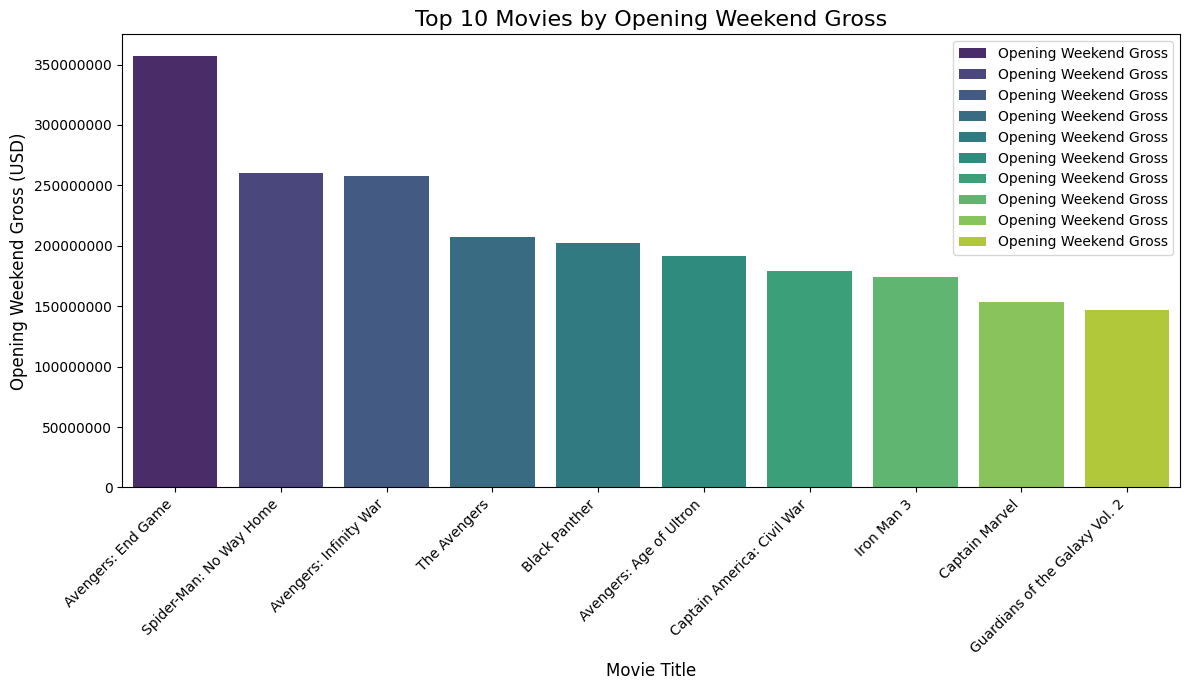

In [ ]:
top_10_opening_weekend = marvel.sort_values(by='opening_weekend', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='movie_title', y='opening_weekend', data=top_10_opening_weekend, palette='viridis', label='Opening Weekend Gross')
plt.title('Top 10 Movies by Opening Weekend Gross', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Opening Weekend Gross (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

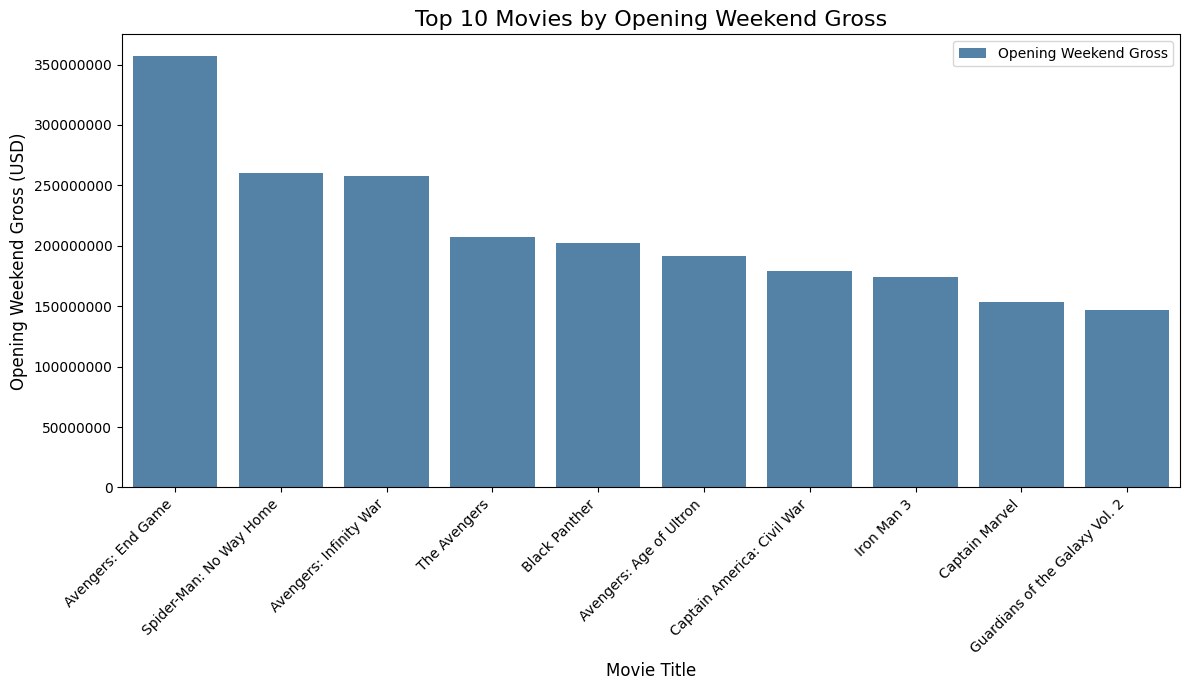

In [ ]:
top_10_opening_weekend = marvel.sort_values(by='opening_weekend', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='movie_title', y='opening_weekend', data=top_10_opening_weekend, color='steelblue', label='Opening Weekend Gross')
plt.title('Top 10 Movies by Opening Weekend Gross', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Opening Weekend Gross (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

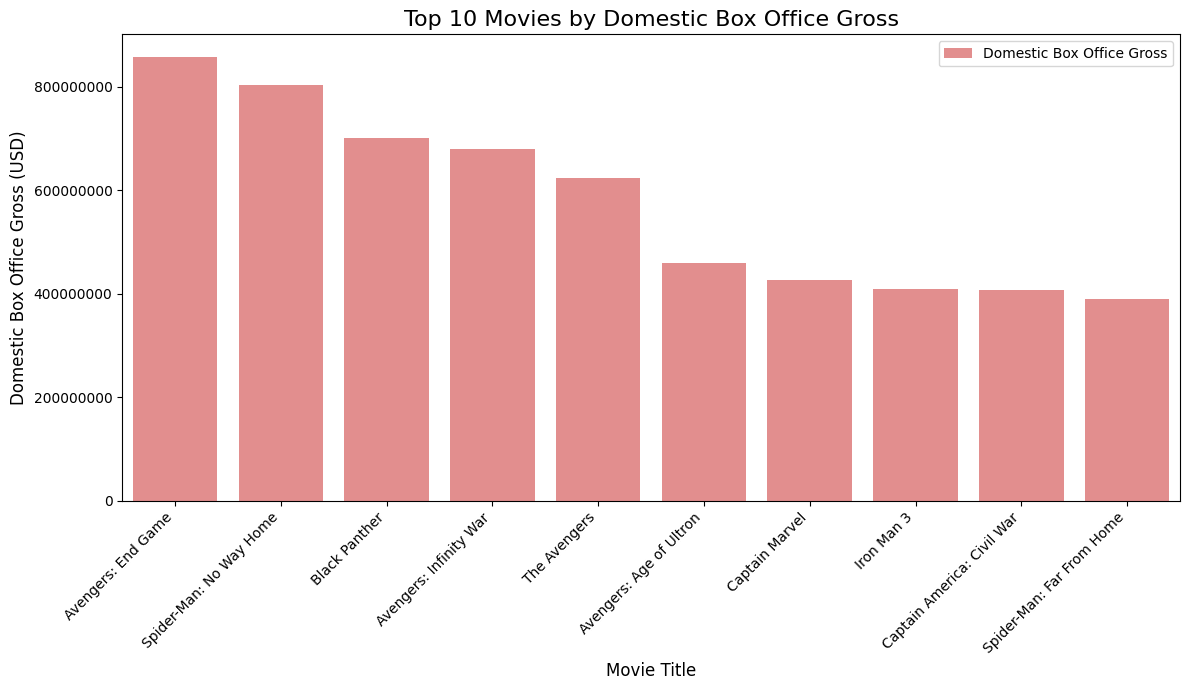

In [ ]:
top_10_domestic_box_office = marvel.sort_values(by='domestic_box_office', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='movie_title', y='domestic_box_office', data=top_10_domestic_box_office, color='lightcoral', label='Domestic Box Office Gross')
plt.title('Top 10 Movies by Domestic Box Office Gross', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Domestic Box Office Gross (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

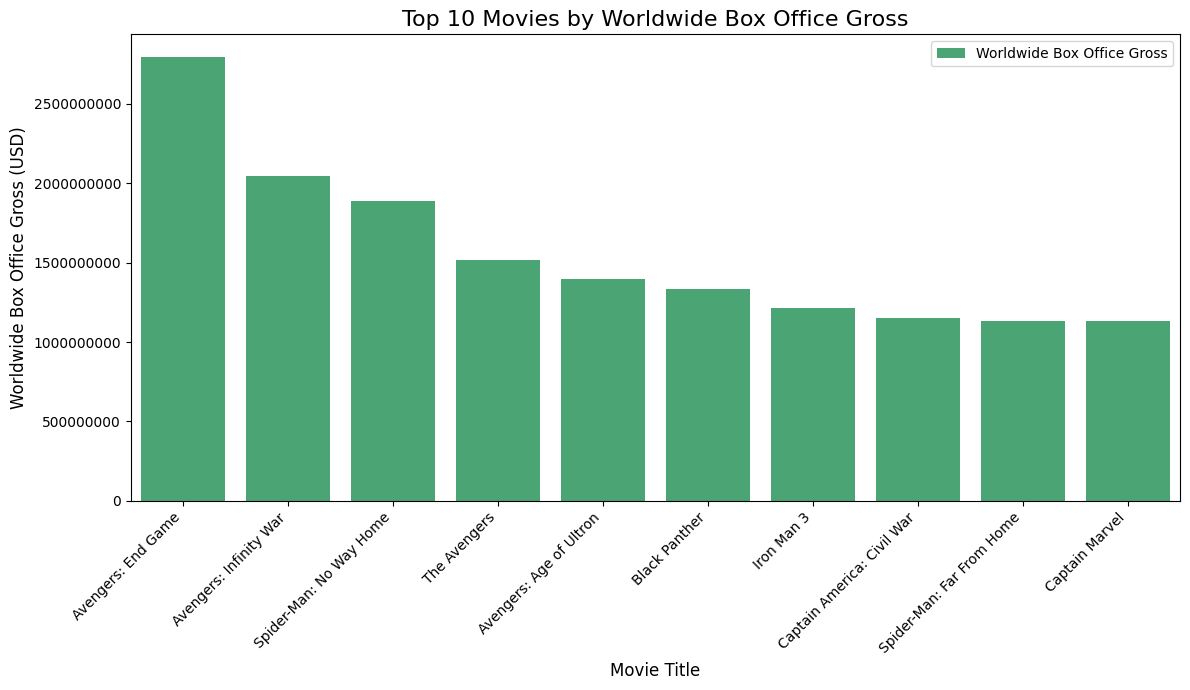

In [ ]:
top_10_worldwide_box_office = marvel.sort_values(by='worldwide_box_office', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='movie_title', y='worldwide_box_office', data=top_10_worldwide_box_office, color='mediumseagreen', label='Worldwide Box Office Gross')
plt.title('Top 10 Movies by Worldwide Box Office Gross', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Worldwide Box Office Gross (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

## Group by MCU Phase and Sum Worldwide Box Office


In [ ]:
worldwide_gross_by_phase = marvel.groupby('mcu_phase')['worldwide_box_office'].sum()
print("Worldwide Box Office Gross by MCU Phase:")
print(worldwide_gross_by_phase)

Worldwide Box Office Gross by MCU Phase:
mcu_phase
1     3806898400
2     5259454500
3    13494274840
4     3105167911
Name: worldwide_box_office, dtype: int64


/tmp/ipython-input-1011274547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worldwide_gross_by_phase.index, y=worldwide_gross_by_phase.values, palette='viridis')


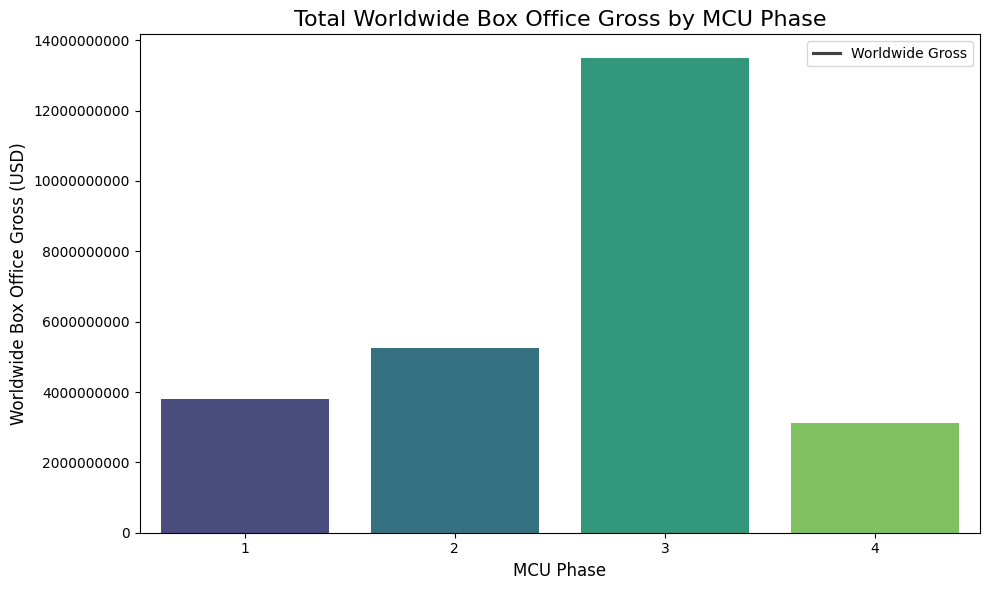

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=worldwide_gross_by_phase.index, y=worldwide_gross_by_phase.values, palette='viridis')
plt.title('Total Worldwide Box Office Gross by MCU Phase', fontsize=16)
plt.xlabel('MCU Phase', fontsize=12)
plt.ylabel('Worldwide Box Office Gross (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.legend(labels=['Worldwide Gross'])
plt.tight_layout()
plt.show()

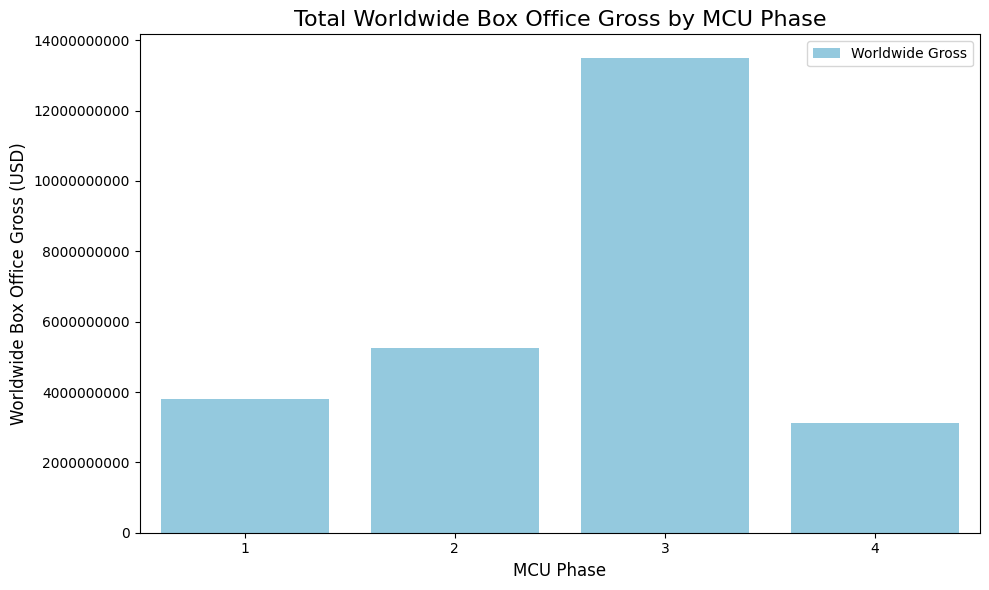

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=worldwide_gross_by_phase.index, y=worldwide_gross_by_phase.values, color='skyblue', label='Worldwide Gross')
plt.title('Total Worldwide Box Office Gross by MCU Phase', fontsize=16)
plt.xlabel('MCU Phase', fontsize=12)
plt.ylabel('Worldwide Box Office Gross (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
correlation = marvel['tomato_meter'].corr(marvel['worldwide_box_office'])
print(f"Correlation between Tomato Meter and Worldwide Box Office: {correlation:.2f}")

Correlation between Tomato Meter and Worldwide Box Office: 0.41


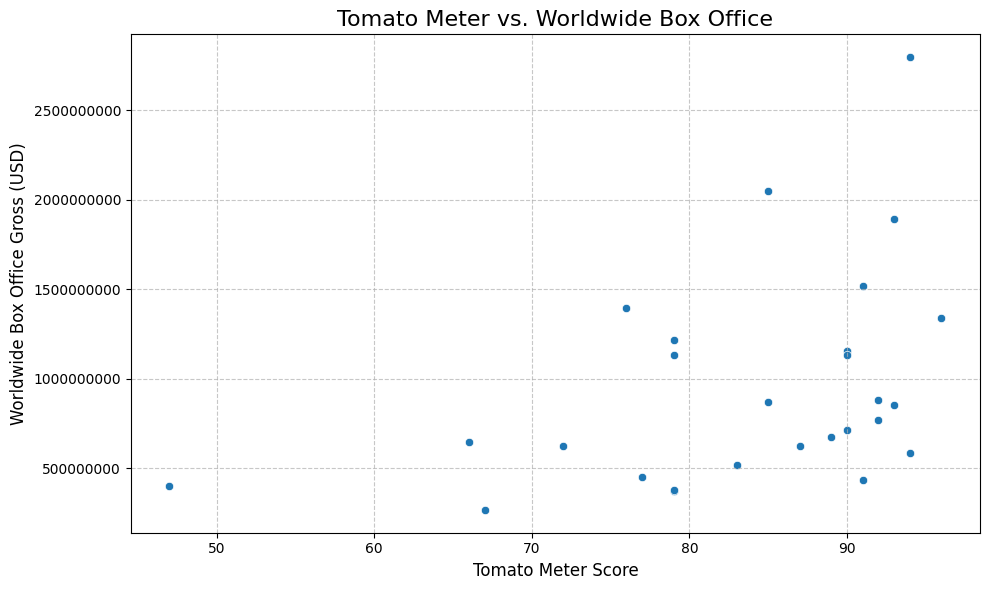

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tomato_meter', y='worldwide_box_office', data=marvel)
plt.title('Tomato Meter vs. Worldwide Box Office', fontsize=16)
plt.xlabel('Tomato Meter Score', fontsize=12)
plt.ylabel('Worldwide Box Office Gross (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Calculate Annual Box Office Averages


In [ ]:
annual_averages = marvel.groupby('release_year')[['opening_weekend', 'domestic_box_office', 'worldwide_box_office']].mean()
print("Annual Box Office Averages by Release Year:")
print(annual_averages.head())

Annual Box Office Averages by Release Year:
              opening_weekend  domestic_box_office  worldwide_box_office
release_year                                                            
2008               78766359.0          226705519.5          4.253727e+08
2010              128122480.0          312433331.0          6.211564e+08
2011               65390931.0          178842564.5          4.099482e+08
2012              207438708.0          623357910.0          1.515100e+09
2013              129941213.0          307677206.0          9.299974e+08


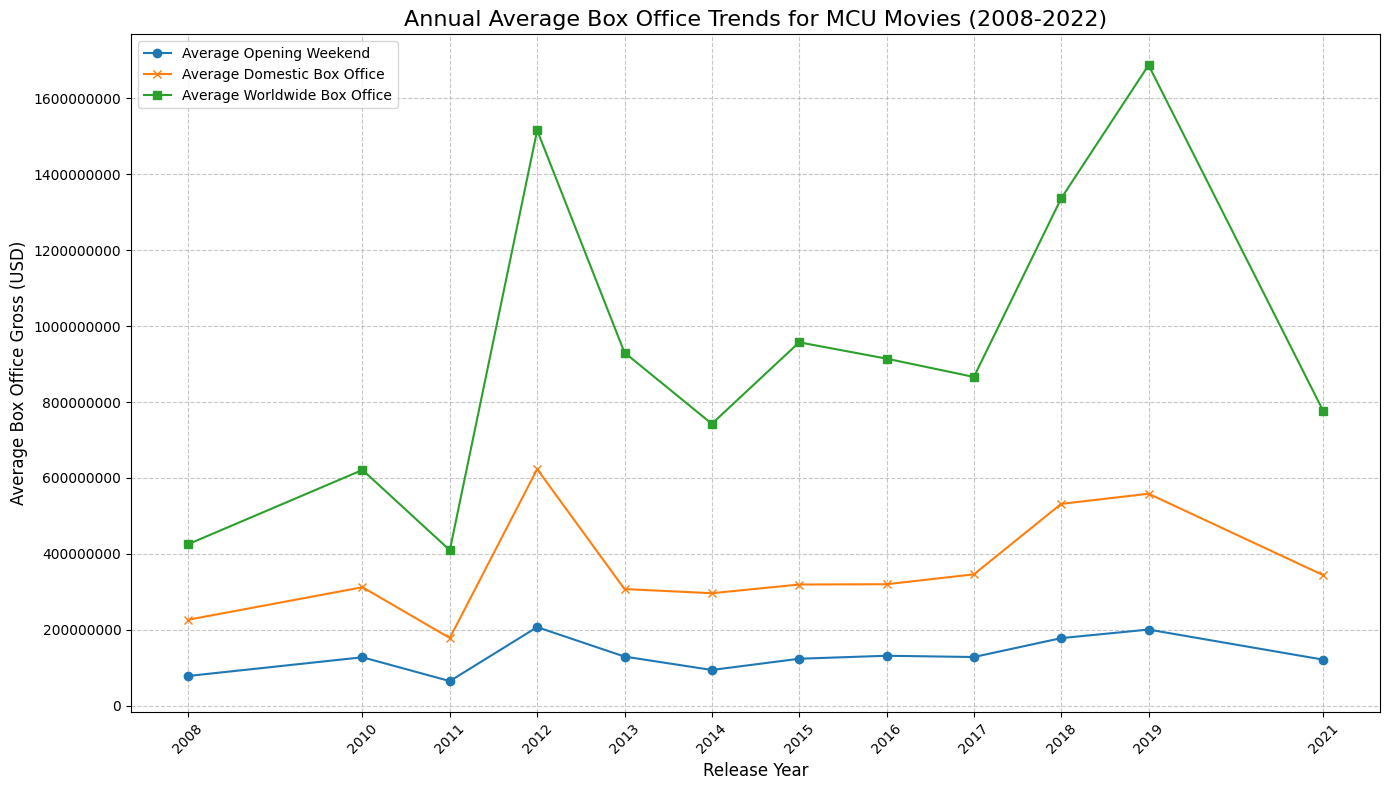

In [ ]:
plt.figure(figsize=(14, 8))

plt.plot(annual_averages.index, annual_averages['opening_weekend'], label='Average Opening Weekend', marker='o')
plt.plot(annual_averages.index, annual_averages['domestic_box_office'], label='Average Domestic Box Office', marker='x')
plt.plot(annual_averages.index, annual_averages['worldwide_box_office'], label='Average Worldwide Box Office', marker='s')

plt.title('Annual Average Box Office Trends for MCU Movies (2008-2022)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Box Office Gross (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(annual_averages.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion
*   **Total Worldwide Box Office Gross by MCU Phase**:
    *   Phase 1: $3,806,898,400
    *   Phase 2: $5,259,454,500
    *   Phase 3: $13,494,274,840
    *   Phase 4: $3,105,167,911
*   **Phase 3 Dominance**: MCU Phase 3 achieved the highest total worldwide box office gross, significantly outperforming all other phases with over $13.49 billion.

*    **Growth Trend**: There was a clear upward trend in worldwide gross from Phase 1 to Phase 3, indicating increasing popularity and audience engagement over time.
*   **Phase 4 Decline**: Phase 4 experienced a notable decrease in total worldwide box office gross compared to the peak of Phase 3, dropping to approximately $3.11 billion. This could be attributed to factors like the COVID-19 pandemic, changing audience preferences, or a shift in the cinematic universe's strategic direction.
*   **Consistent Performance**: Despite fluctuations, all MCU phases have generated billions in worldwide box office, highlighting the franchise's strong and consistent global financial success.
*   **Top-Performing Movies**: The 'Avengers' franchise films consistently rank at the top across all box office categories (opening weekend, domestic, and worldwide), indicating their significant commercial success. Movies like 'Spider-Man: No Way Home' and 'Black Panther' also demonstrated strong financial performance.
*    **Correlation between Tomato Meter and Worldwide Box Office**: A moderate positive correlation of approximately **0.41** was observed between the Tomato Meter score and worldwide box office gross, suggesting that higher critical scores tend to correspond with higher box office revenue, though other factors clearly play a significant role.
